# Final Project - House Sales Regression

Austin Mallie, Cynthia Portales-Loebell, Celina Velazquez
Shiley-Marcos School of Engineering, University of San Diego
ADS-500B Data Science Programming
Dr. Mohammad Yavarimanesh

This project is a linear regression analysis for house sales data in King County, Washington from May 2014 to May 2015.

This section imports the libraries that are needed.

In [108]:
import os
import pandas as pd
import numpy as np
import sklearn

##1. Data Importing and Pre-Processing
### Exploratory Data Analysis
Descriptive statistics

Feature Selection
Determine correlation to identify multicollinearity

Clean date field by determining the length of the field to determine if it is consistent, then trimming the last # characters. Manage blanks in bedrooms, bathrooms, sqft_living, sqft_lot field, need to know scale of condition variable (i.e. is 5 good or bad?). Need to understand difference between sqft_living, sqft_lot, sqft_living15, sqft_lot15. 

Determine the current working directory.

In [109]:
os.getcwd()

'C:\\Users\\Austi\\Jupyter Notebook work'

Import the data file and display the records.

In [110]:
sales = pd.read_csv("house_sales.csv")
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3.00,2.50,1530.00,1131.00,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4.00,2.50,2310.00,5813.00,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2.00,0.75,1020.00,1350.00,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3.00,2.50,1600.00,2388.00,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


Display the dimensions of the dataframe. There are 21613 records and 21 columns.

In [111]:
sales.shape

(21613, 21)

Display data types for columns in dataframe. There are 12 int64 (i.e. integer) variables, 8 float64 (i.e. continuous variables), and one object (i.e. string) variable. The date field is a string variable which has been imported as the incorrect type, and requires cleaning.

In [112]:
sales.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Calculate summary statistics for the dataset.

In [113]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,20479.00,20545.00,20503.00,20569.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2081.07,15179.82,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,915.04,41486.17,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.50,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1920.00,7620.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10708.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,12050.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


Calculate the number of null values in each field.

In [114]:
sales.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Remove the extra characters from the date field.

In [115]:
sales['date'].str[:-7]

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

Format the date field as a date data type.

In [116]:
sales['date'] = pd.to_datetime(sales['date'])

Confirm the change by checking data type of date field. The change is confirmed.

In [117]:
sales.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Create a Pearson Correlation Coefficient matrix to determine whether there is multicollinearity between variables to determine feature selection. Variables that are highly correlated will be analyzed for removal.

In [118]:
sales.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.01,-0.02,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,...,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
date,0.01,1.00,-0.00,-0.01,-0.03,-0.03,0.01,-0.02,0.00,-0.00,...,-0.04,-0.03,-0.02,-0.00,-0.02,0.00,-0.03,-0.01,-0.03,0.00
price,-0.02,-0.00,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,...,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,-0.01,0.31,1.00,0.52,0.58,0.03,0.18,-0.00,0.08,...,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.00,-0.03,0.53,0.52,1.00,0.75,0.09,0.50,0.07,0.19,...,0.67,0.69,0.28,0.51,0.05,-0.21,0.03,0.22,0.57,0.09
sqft_living,-0.01,-0.03,0.70,0.58,0.75,1.00,0.17,0.36,0.11,0.28,...,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.01,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,...,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.15,0.73
floors,0.02,-0.02,0.26,0.18,0.50,0.36,-0.01,1.00,0.02,0.03,...,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.00,0.27,-0.00,0.07,0.11,0.02,0.02,1.00,0.40,...,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,-0.00,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,...,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07


The *sqft_living* and *sqft_lot field* appear to be very similar to the *sqft_living15* and *sqft_lot15* fields. According to the Pearson Correlation Coefficient matrix, the correlation between *sqft_living* and *sqft_living15* is 0.756901. Similarly, the correlation coefficient between *sqft_lot field* and *sqft_lot15* is 0.728800. According to Pennsylvania State University (2018), "multicollinearity exists when two or more of the predictors in a regression model are moderately or highly correlated with one another". In addition, a correlation coefficient of .8 or higher indicates multicollinearity. The values of ~.76 and ~.73 indicate moderate to high multicollinearity, and, as a result, these variables will be dropped.

In [119]:
sales1 = sales.drop(['sqft_living15', 'sqft_lot15'], axis=1)
sales1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26
1,6414100192,2014-12-09,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32
2,5631500400,2015-02-25,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23
3,2487200875,2014-12-09,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39
4,1954400510,2015-02-18,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3.00,2.50,1530.00,1131.00,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35
21609,6600060120,2015-02-23,400000.00,4.00,2.50,2310.00,5813.00,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36
21610,1523300141,2014-06-23,402101.00,2.00,0.75,1020.00,1350.00,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30
21611,291310100,2015-01-16,400000.00,3.00,2.50,1600.00,2388.00,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07


In the next step, *bathrooms*, *grade*, and *sqft_above* have correlation coefficients of 0.754229, 0.763833, and 0.875966, respectively, with *sqft_living*. This indicates the presence of multicollinearity with this variable. In this model, we will remove these variables, however, it would be beneficial to test a separate model using these variables in place of sqft_living to compare models.

In addition, because a geospatial analysis is not part of this study, the *lat* and *long* variables will be removed.

Categorical variables (i.e. *id*, *date*, *zipcode*) and the *date* field will also be removed in the next step since these values are not valid in a regression analysis.

In [120]:
sales2 = sales1.drop(['bathrooms', 'grade', 'sqft_above', 'lat', 'long', 'id', 'date', 'zipcode'], axis=1)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated
0,221900.00,3.00,1180.00,5650.00,1.00,0,0,3,0,1955,0
1,538000.00,3.00,2570.00,7242.00,2.00,0,0,3,400,1951,1991
2,180000.00,2.00,770.00,10000.00,1.00,0,0,3,0,1933,0
3,604000.00,4.00,1960.00,5000.00,1.00,0,0,5,910,1965,0
4,510000.00,3.00,1680.00,8080.00,1.00,0,0,3,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3.00,1530.00,1131.00,3.00,0,0,3,0,2009,0
21609,400000.00,4.00,2310.00,5813.00,2.00,0,0,3,0,2014,0
21610,402101.00,2.00,1020.00,1350.00,2.00,0,0,3,0,2009,0
21611,400000.00,3.00,1600.00,2388.00,2.00,0,0,3,0,2004,0


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='sqft_lot', ylabel='price'>,
        <Axes: xlabel='floors', ylabel='price'>,
        <Axes: xlabel='waterfront', ylabel='price'>,
        <Axes: xlabel='view', ylabel='price'>,
        <Axes: xlabel='condition', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>,
        <Axes: xlabel='yr_built', ylabel='price'>,
        <Axes: xlabel='yr_renovated', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_lot', ylabel='bedrooms'>,
        <Axes: xlabel='floors', ylabel='bedrooms'>,
        <Axes: xlabel='waterfront', ylabel='bedrooms'>,
        <Axes: xlabel='view', ylabel='bedrooms'>,
        <Axes: xlabel='condition', ylabel='bedrooms'>,
   

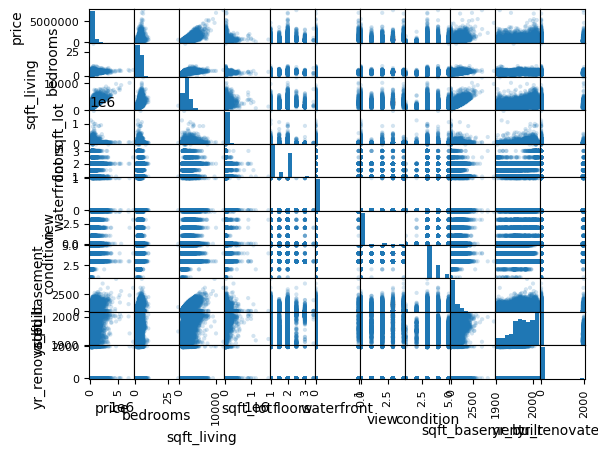

In [121]:
pd.plotting.scatter_matrix(sales2, alpha=0.2)

Construct new variable for the age of the house using the yr_built variable.

In [153]:
sales2['age'] = 2024 - sales2['yr_built']
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age
0,221900.00,3.00,1180.00,5650.00,1.00,0,0,3,0,1955,0,69
1,538000.00,3.00,2570.00,7242.00,2.00,0,0,3,400,1951,1991,73
2,180000.00,2.00,770.00,10000.00,1.00,0,0,3,0,1933,0,91
3,604000.00,4.00,1960.00,5000.00,1.00,0,0,5,910,1965,0,59
4,510000.00,3.00,1680.00,8080.00,1.00,0,0,3,0,1987,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3.00,1530.00,1131.00,3.00,0,0,3,0,2009,0,15
21609,400000.00,4.00,2310.00,5813.00,2.00,0,0,3,0,2014,0,10
21610,402101.00,2.00,1020.00,1350.00,2.00,0,0,3,0,2009,0,15
21611,400000.00,3.00,1600.00,2388.00,2.00,0,0,3,0,2004,0,20


Calculate recency of renovation using the yr_renovated variable if the house was renovated, otherwise, use the age of the house.

In [154]:
sales2['age_reno'] = np.where(sales['yr_renovated'] != 0, 2024 - sales2['yr_renovated'], sales2['age'])
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age,age_reno
0,221900.00,3.00,1180.00,5650.00,1.00,0,0,3,0,1955,0,69,69
1,538000.00,3.00,2570.00,7242.00,2.00,0,0,3,400,1951,1991,73,33
2,180000.00,2.00,770.00,10000.00,1.00,0,0,3,0,1933,0,91,91
3,604000.00,4.00,1960.00,5000.00,1.00,0,0,5,910,1965,0,59,59
4,510000.00,3.00,1680.00,8080.00,1.00,0,0,3,0,1987,0,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3.00,1530.00,1131.00,3.00,0,0,3,0,2009,0,15,15
21609,400000.00,4.00,2310.00,5813.00,2.00,0,0,3,0,2014,0,10,10
21610,402101.00,2.00,1020.00,1350.00,2.00,0,0,3,0,2009,0,15,15
21611,400000.00,3.00,1600.00,2388.00,2.00,0,0,3,0,2004,0,20,20


Now that we have constructed new features using the ordinal variables *yr_built* and *yr_renovated*, we can now remove these variables. In addition, to prevent multicollinearity between the newly constructed variables, *age* and *age_reno*, *age* will be dropped, and *age_reno* will be used as a proxy.

In [155]:
sales2 = sales2.drop(['yr_built', 'yr_renovated', 'age'], axis=1)
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
0,221900.00,3.00,1180.00,5650.00,1.00,0,0,3,0,69
1,538000.00,3.00,2570.00,7242.00,2.00,0,0,3,400,33
2,180000.00,2.00,770.00,10000.00,1.00,0,0,3,0,91
3,604000.00,4.00,1960.00,5000.00,1.00,0,0,5,910,59
4,510000.00,3.00,1680.00,8080.00,1.00,0,0,3,0,37
...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3.00,1530.00,1131.00,3.00,0,0,3,0,15
21609,400000.00,4.00,2310.00,5813.00,2.00,0,0,3,0,10
21610,402101.00,2.00,1020.00,1350.00,2.00,0,0,3,0,15
21611,400000.00,3.00,1600.00,2388.00,2.00,0,0,3,0,20


### Handle Missing Data

There are three remaining variables (i.e. bedrooms, 
sqft_livg, 0
sqft_0 that have missing data. The missing data represent ~5% of the total number of records. Despite the low incidence, we populate the missing values.44)

In [156]:
sales2[['bedrooms', 'sqft_living', 'sqft_lot']].isnull().sum()/21613

bedrooms      0.00
sqft_living   0.00
sqft_lot      0.00
dtype: float64

Calculate summary statistics for the variables that have missing values.

In [157]:
sales2[['bedrooms', 'sqft_living', 'sqft_lot']].describe()

,bedrooms,sqft_living,sqft_lot
count,21613.00,21613.00,21613.00
mean,3.35,2072.80,14814.65
std,0.89,891.94,40504.19
min,0.00,290.00,520.00
25%,3.00,1450.00,5140.00
50%,3.00,1920.00,7620.00
75%,4.00,2510.00,10404.00
max,10.00,12050.00,1651359.00


Visualize the summary statistics with boxplots.

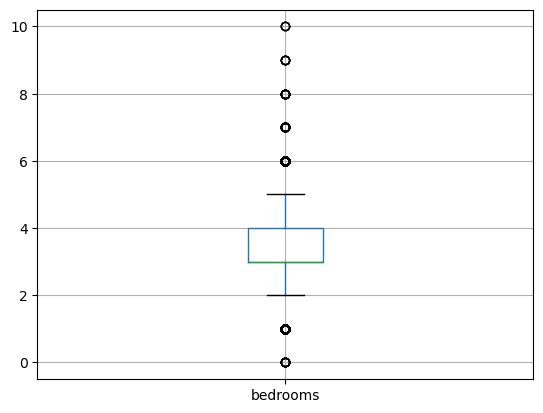

In [158]:
boxplot_bed = sales2.boxplot(column=['bedrooms']) 

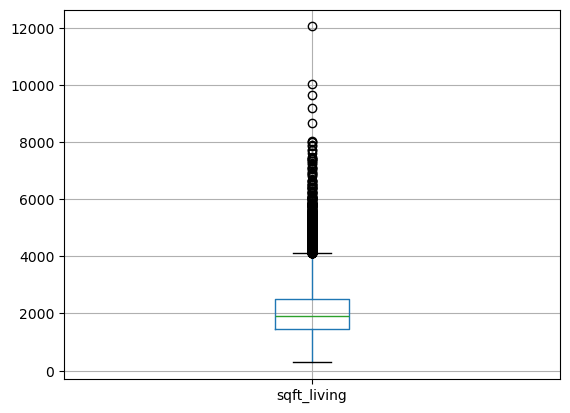

In [159]:
boxplot_liv = sales2.boxplot(column=['sqft_living']) 

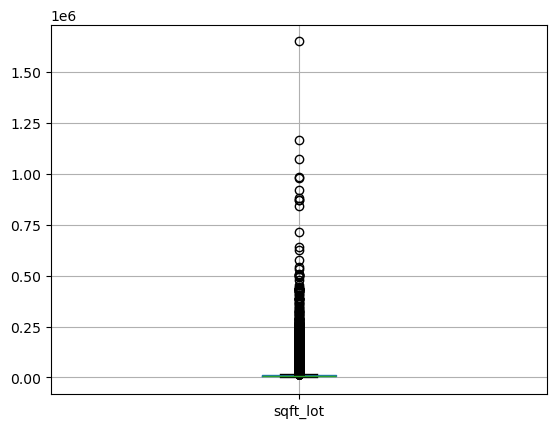

In [160]:
boxplot_lot = sales2.boxplot(column=['sqft_lot']) 

To determine how to replace the null values in the bedrooms field, we consider that we can use mean, median, or mode. However, there is a large outlier that would impact the mean. We inspect this outlier to determine if it is valid or should be adjusted or removed.

To determine how to handle the outlier in *bedrooms*, we will display the record that has the outlier of 33 bedrooms to determine if the price aligns with the extreme number of bedrooms or if it could be a data entry error.

The price of $640,000 is around the 75th percentile. Intuition tells us that a higher number of bedrooms is correlated with a higher price, and the price seems to not align with 33 bedrooms.

In [161]:
sales2.loc[sales2['bedrooms'] == 33]

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno


To understand the number of bedrooms associated with the houses sold at the highest prices, we display the records that are greater than $7,000,000.

We find that there are two houses in this category, and they have five and six rooms each.

In [162]:
sales2.loc[sales2['price'] > 7000000]

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
3914,7062500.00,5.00,10040.00,37325.00,2.00,1,2,3,2360,23
7252,7700000.00,6.00,12050.00,27600.00,2.50,0,3,4,3480,37


Given the discord between the price and the number of rooms, it appears that the number of bedrooms is a data entry error. We will replace this value with the most common number of bedrooms (i.e. the mode) for houses that cost between \$600,000 and \$700,000 since prices are correlated with number of bedrooms. The mode for this price range is four.

In [163]:
mean_600k = sales2.loc[(sales2['price'] >= 600000) & (sales2['price'] <= 700000)]
mean_600k['bedrooms'].mode()

0   3.00
Name: bedrooms, dtype: float64

Replace the outlier of 33 bedrooms with the mode of 4.

In [164]:
sales2['bedrooms'] = np.where(sales2['bedrooms'] == 33, 4, sales2['bedrooms'])
sales2

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
0,221900.00,3.00,1180.00,5650.00,1.00,0,0,3,0,69
1,538000.00,3.00,2570.00,7242.00,2.00,0,0,3,400,33
2,180000.00,2.00,770.00,10000.00,1.00,0,0,3,0,91
3,604000.00,4.00,1960.00,5000.00,1.00,0,0,5,910,59
4,510000.00,3.00,1680.00,8080.00,1.00,0,0,3,0,37
...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3.00,1530.00,1131.00,3.00,0,0,3,0,15
21609,400000.00,4.00,2310.00,5813.00,2.00,0,0,3,0,10
21610,402101.00,2.00,1020.00,1350.00,2.00,0,0,3,0,15
21611,400000.00,3.00,1600.00,2388.00,2.00,0,0,3,0,20


In [165]:
sales2.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.35,2072.80,14814.65,1.49,0.01,0.23,3.41,291.51,50.61
std,367127.20,0.89,891.94,40504.19,0.54,0.09,0.77,0.65,442.58,28.81
min,75000.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,0.00,9.00
25%,321950.00,3.00,1450.00,5140.00,1.00,0.00,0.00,3.00,0.00,25.00
50%,450000.00,3.00,1920.00,7620.00,1.50,0.00,0.00,3.00,0.00,47.00
75%,645000.00,4.00,2510.00,10404.00,2.00,0.00,0.00,4.00,560.00,70.00
max,7700000.00,10.00,12050.00,1651359.00,3.50,1.00,4.00,5.00,4820.00,124.00


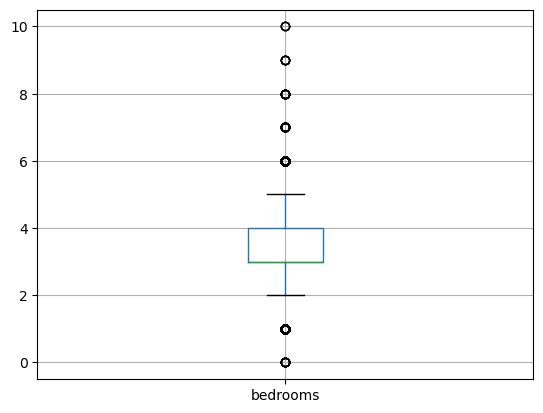

In [166]:
boxplot_bed2 = sales2.boxplot(column=['bedrooms'])

The bedrooms variable is still slightly right-skewed, so we will use the median to replace the null values.

In [167]:
sales2['bedrooms'] = np.where(sales2['bedrooms'].isnull(), 3, sales2['bedrooms'])

Check if the null values were replaced correctly.

In [168]:
sales2[['bedrooms']].isnull().sum()

bedrooms    0
dtype: int64

For *sqft_living* and *sqft_lot*, we will replace the null values with the median because both variables are right-skewed, and the median is robust to outliers.

In [169]:
sales2['sqft_living'] = np.where(sales2['sqft_living'].isnull(), 1920, sales2['sqft_living'])

In [170]:
sales2[['sqft_living']].isnull().sum()

sqft_living    0
dtype: int64

In [171]:
sales2['sqft_lot'] = np.where(sales2['sqft_lot'].isnull(), 7620, sales2['sqft_lot'])

In [172]:
sales2[['sqft_lot']].isnull().sum()

sqft_lot    0
dtype: int64

### Normalize the Data

Normalization is used when the scales of the data are very different (Bhandari, 2024). To determine if that is the case with the sales2 data, we will visualized the data with boxplots.

<Axes: >

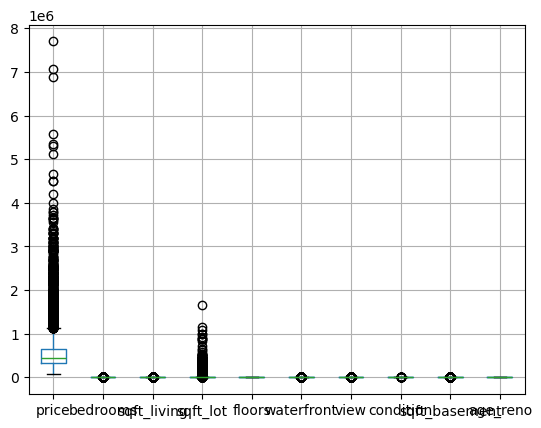

In [173]:
sales2.boxplot()

The difference in scale is evident; the distribution of some features is indiscernible due to the large difference in scale. Per Bhandari (2024), normalization and standardization are important for non-normal data that will be used in a regression analysis, and the following code comes from this source.

In [174]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(sales2)

# transform training data
sales2_norm = norm.transform(sales2)
print("Scaled Sales Data: \n\n")
print(sales2_norm)

Scaled Sales Data: 


[[0.01926557 0.3        0.07568027 ... 0.5        0.         0.52173913]
 [0.06072131 0.3        0.19387755 ... 0.5        0.08298755 0.20869565]
 [0.01377049 0.2        0.04081633 ... 0.5        0.         0.71304348]
 ...
 [0.04289849 0.2        0.06207483 ... 0.5        0.         0.05217391]
 [0.04262295 0.3        0.11139456 ... 0.5        0.         0.09565217]
 [0.03278689 0.2        0.06207483 ... 0.5        0.         0.06086957]]


Visualize the data using matplotlib since the data has changed from a Pandas dataframe to a numpy N-dimensional array (i.e. ndarray), and boxplot(), the Pandas function, no longer applies.

{'whiskers': [<matplotlib.lines.Line2D at 0x24e19474770>,
 'caps': [<matplotlib.lines.Line2D at 0x24e19474d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e194744d0>,
 'medians': [<matplotlib.lines.Line2D at 0x24e194751f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24e194754f0>,
 'means': []}

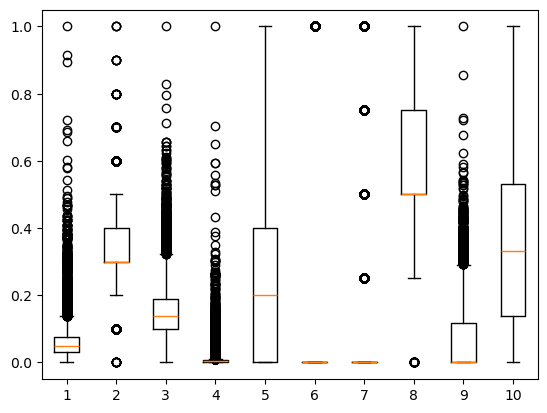

In [175]:
import matplotlib.pyplot as plt
plt.boxplot(sales2_norm)

#References

Bhandari, A. (2024, June 9). Feature scaling: Engineering, Normalization, and standardization (updated 2024). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=of%20the%20features!-,What%20is%20Normalization?,values%20of%20the%20feature%2C%20respectively. 
Pennsylvania State University. (2018). 10.4 - multicollinearity. 10.4 - Multicollinearity | STAT 462. https://online.stat.psu.edu/stat462/node/177/


### Data Analysis and Visualization
Here we review the measures of centrality on our updated dataset. First we take a look at the data types of the columns remaining. There are 5 int64 (i.e. integer) variables, 5 float64 (i.e. continuous variables). There are 3 categorical variables - waterfront, view and condition (condition is also an ordinal variable because it is using a rating scale where it could mean for conditions, 1= poor and 5 = excellent). There are 7 numerical variables, of which 3 are discrete variables and 4 continuous variables.

In [176]:
sales2.dtypes

price            float64
bedrooms         float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_basement      int64
age_reno           int64
dtype: object

We want to look at the measures of centrality, however, we want to point out that some columns are categorical variables so the descriptive statistics returned does not mean anything to us. Those variables include "Waterfront", "View, and "Condition". Waterfront is binary in that the data is either a 0 or 1, either it is not a waterfront or it is. View is a number from 0 to 4, and condition is a number from 1 to 5. These are applying some sort of ranking, so looking at the Mode would be something more helpful to us than mean. In addition, bedrooms and floors are discrete variables because we cannot have half a bedroom, so things like mean or std are not helpful, but median would be. Median is the 50% row.

When using the describe command, the price column was returning scientific notation and affecting the graphs, so we used the next command to have a consistent format across the data.

In [177]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [178]:

sales2.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.35,2072.80,14814.65,1.49,0.01,0.23,3.41,291.51,50.61
std,367127.20,0.89,891.94,40504.19,0.54,0.09,0.77,0.65,442.58,28.81
min,75000.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,0.00,9.00
25%,321950.00,3.00,1450.00,5140.00,1.00,0.00,0.00,3.00,0.00,25.00
50%,450000.00,3.00,1920.00,7620.00,1.50,0.00,0.00,3.00,0.00,47.00
75%,645000.00,4.00,2510.00,10404.00,2.00,0.00,0.00,4.00,560.00,70.00
max,7700000.00,10.00,12050.00,1651359.00,3.50,1.00,4.00,5.00,4820.00,124.00


In [179]:

sales2.mode()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,age_reno
0,350000.00,3.00,1920.00,7620.00,1.00,0.00,0.00,3.00,0.00,10.00
1,450000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These histograms show interesting information on the frequency of these variables. We can visually see that the number of bedrooms seen in most of the homes in our data is 3. We also see that almost all homes are not waterfront (0). We can also see that the mode of condition is 3, followed by a 4, and then a 5.

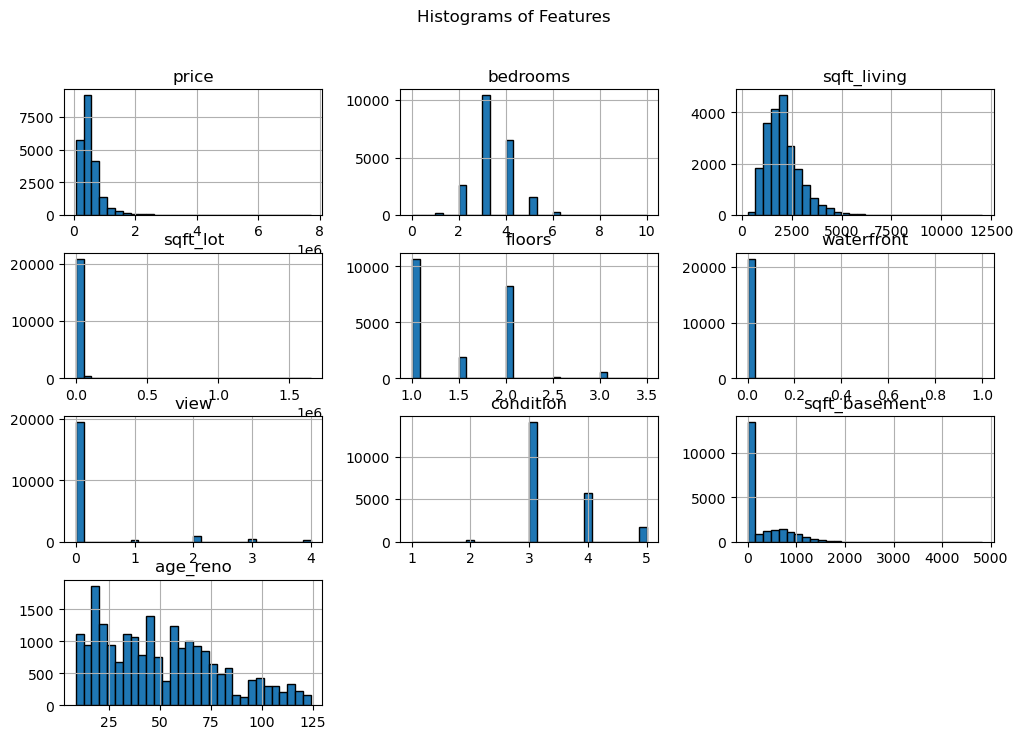

In [180]:
sales2.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()


Because sq ft living is significantly right skewed we wanted to build a histogram of sq ft living with significantly more bins to be able to visualize the data better.

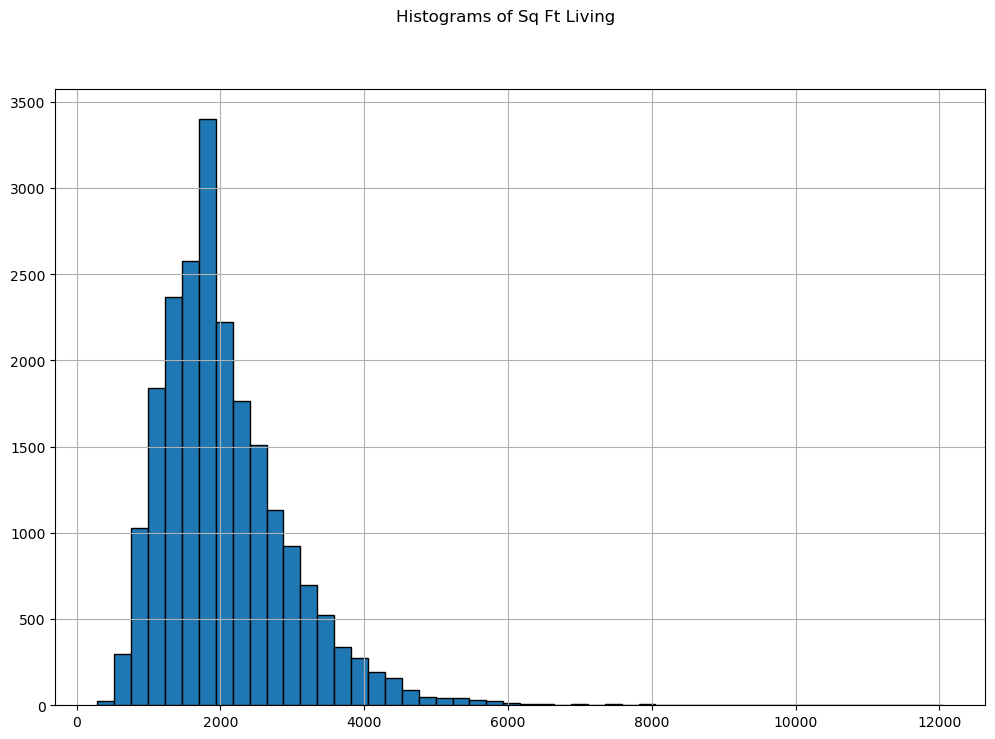

In [181]:
sales2['sqft_living'].hist(figsize=(12, 8), bins=50, edgecolor='black')
plt.suptitle('Histograms of Sq Ft Living')
plt.show()


The graphs were still returning Price with scientific notation, so we used below code so we could customize the formatting. The new histogram lays out housing prices much better visually, and it is apparent it is right skewed.

In [182]:

import matplotlib.ticker as ticker

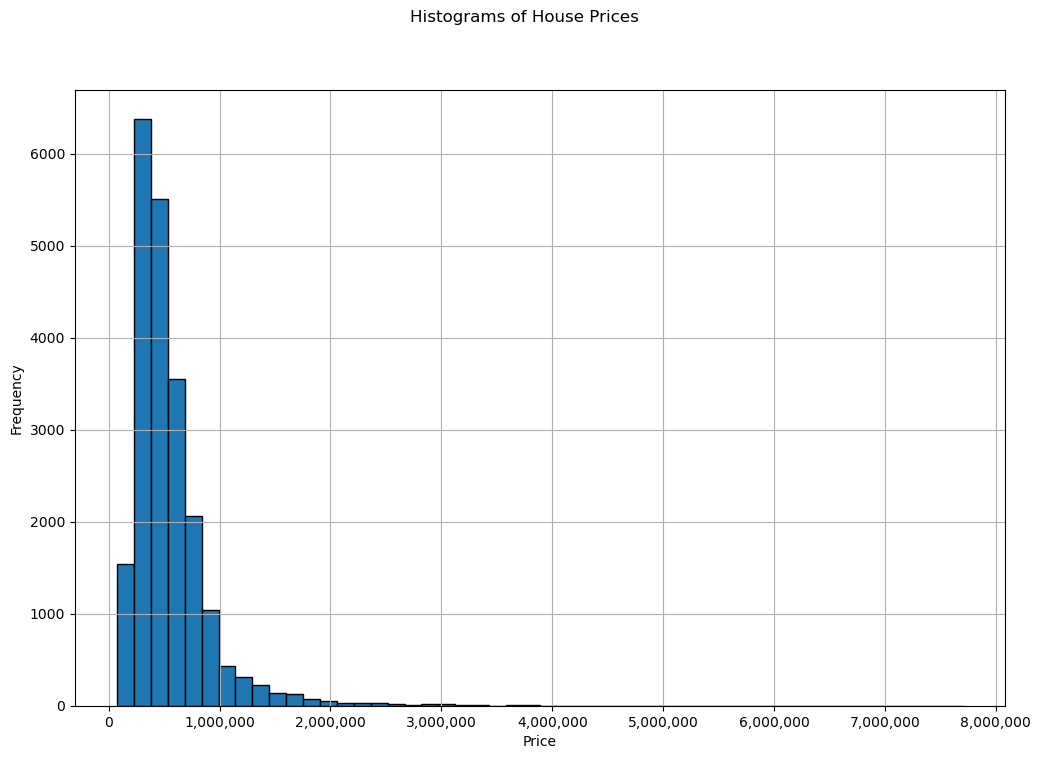

In [183]:
sales2['price'].hist(figsize=(12, 8), bins=50, edgecolor='black')
plt.suptitle('Histograms of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  

plt.show()

Next we look at boxplots of the variables we haven't looked at yet as a boxplot: price, floors, waterfront, view, condition, sqft_basement, age_reno.

In [184]:
import seaborn as sns

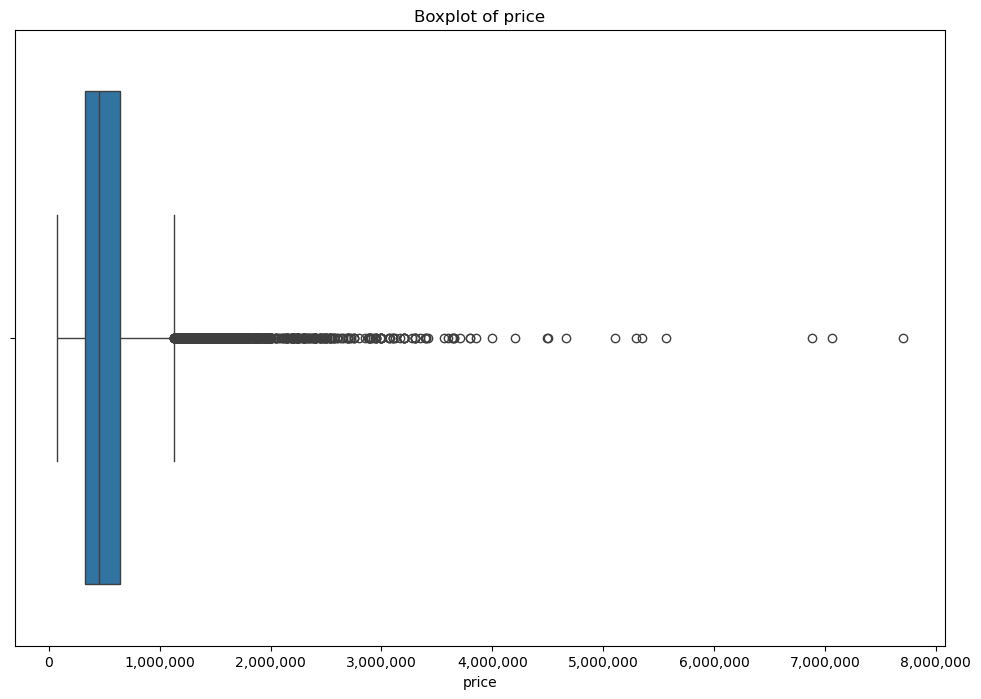

In [185]:
columns_to_plot2 = ['price']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot2):
    plt.subplot(1, len(columns_to_plot2), i+1)
    sns.boxplot(data=sales2, x=column)
    plt.title(f'Boxplot of {column}')
    
    ax = plt.gca()
    
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

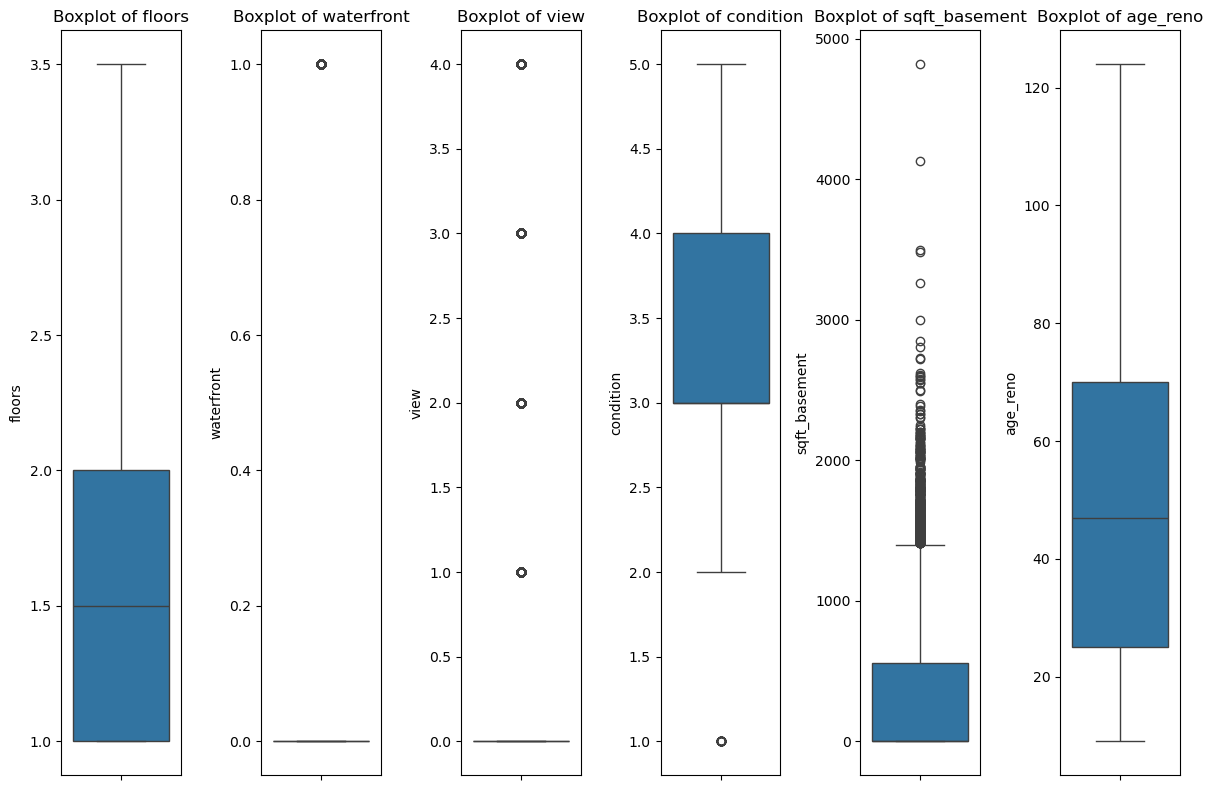

In [186]:
columns_to_plot = ['floors', 'waterfront', 'view',	'condition', 	'sqft_basement', 	'age_reno']
    
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i+1)
    sns.boxplot(sales2[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Next we diagnose correlations between variables, and use a heat map to visualize it.

In [187]:
correlation_matrix = sales2.corr()
print(correlation_matrix)

               price  bedrooms  sqft_living  sqft_lot  floors  waterfront  \
price           1.00      0.31         0.68      0.09    0.26        0.27   
bedrooms        0.31      1.00         0.56      0.03    0.18       -0.01   
sqft_living     0.68      0.56         1.00      0.16    0.35        0.11   
sqft_lot        0.09      0.03         0.16      1.00   -0.01        0.02   
floors          0.26      0.18         0.35     -0.01    1.00        0.02   
waterfront      0.27     -0.01         0.11      0.02    0.02        1.00   
view            0.40      0.08         0.28      0.07    0.03        0.40   
condition       0.04      0.03        -0.06     -0.01   -0.26        0.02   
sqft_basement   0.32      0.30         0.42      0.02   -0.25        0.08   
age_reno       -0.11     -0.17        -0.34     -0.05   -0.51        0.00   

               view  condition  sqft_basement  age_reno  
price          0.40       0.04           0.32     -0.11  
bedrooms       0.08       0.03      

On this heat map, we are seeing that price and sqft_living are highly correlated with a correlation coefficient of .68. Bedrooms and sqft_living are moderately correlated with a correlation coefficient of .56, as well as floors and age_reno are moderately negatively correlated with a coefficient of -.51. The use of a heat map for visualization is helpful to quickly find highly positively correlated variables (dark red) or highly negatively correlated variables (dark blue).

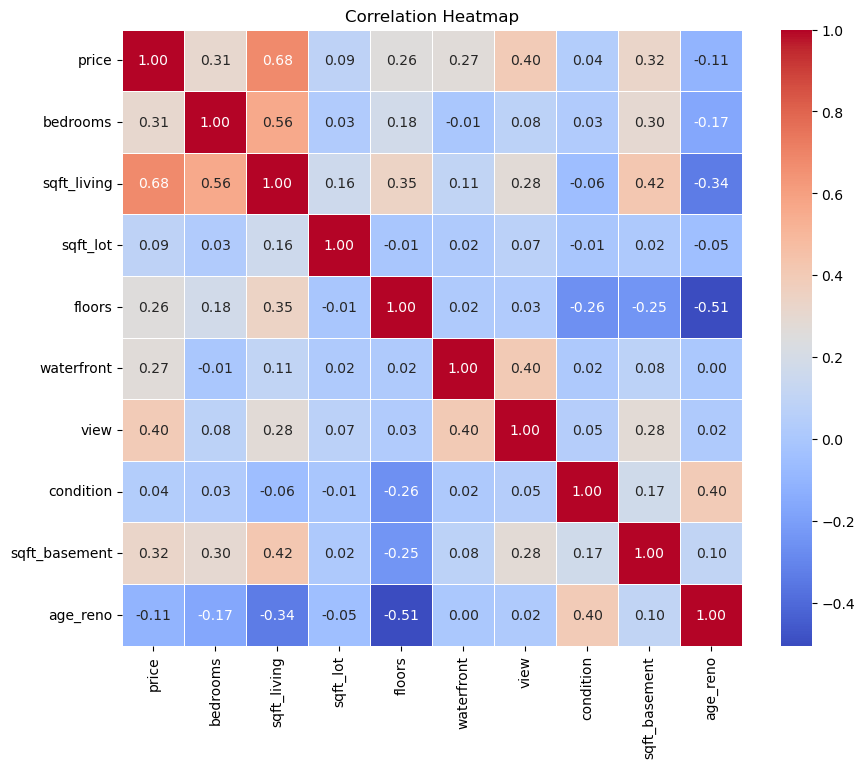

In [188]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Data Analytics

We will be using data analytics to identify our dependent and independent variables as well as determining if supervised or unsupervised learning is appropriate for the data.


Here we will want to identify our independent and dependent variables, so we can properly run our regression on the variable price. 
We will run the correlation matrix again on the updated data set to see the linear relationship between the variables. 


In [63]:
sales.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.01,-0.02,0.00,0.00,-0.01,-0.13,0.02,-0.00,0.01,...,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
date,0.01,1.00,-0.00,-0.01,-0.03,-0.03,0.01,-0.02,0.00,-0.00,...,-0.04,-0.03,-0.02,-0.00,-0.02,0.00,-0.03,-0.01,-0.03,0.00
price,-0.02,-0.00,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,...,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,-0.01,0.31,1.00,0.52,0.58,0.03,0.18,-0.00,0.08,...,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.00,-0.03,0.53,0.52,1.00,0.75,0.09,0.50,0.07,0.19,...,0.67,0.69,0.28,0.51,0.05,-0.21,0.03,0.22,0.57,0.09
sqft_living,-0.01,-0.03,0.70,0.58,0.75,1.00,0.17,0.36,0.11,0.28,...,0.76,0.88,0.43,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.01,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,...,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.15,0.73
floors,0.02,-0.02,0.26,0.18,0.50,0.36,-0.01,1.00,0.02,0.03,...,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.00,0.27,-0.00,0.07,0.11,0.02,0.02,1.00,0.40,...,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,-0.00,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,...,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07


Here we can see that the bathroom, grade and sqft_living have the highest correlation to the pricing of a given house. We will create a regression that will predict the price of a home based on the square footage of the living area.

Now we will load any libraries needed to be able to perform a linear regression on our data. This is due to the continuous range of values that the prices can have. 

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

Here we will be using SimpleImputer to fill in our null values with the median value. This is only just a quick way to fill the incomplete values for this model for the next model we will be using the calculated values from section 1.

We have also determined that supervised learning is the best method to use for our dataset, due to it having labels and our independent variable being continuous.

In [65]:
#sorts the sales CSV into a Data Frame variable.
df = sales

# Select the relevant feature and target
X = df[['sqft_living']]
y = df['price']

Here we have split the data between our independent and dependent variables. Our features will be our independent variable and price will be our
depent variable. 

In [66]:
# Handle missing values using SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
y = y.fillna(y.median())

Here we have used SimpleImputer to quickly replace all of our null values with the median value of that column just like we did above. 

In [67]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Above we have split our data into training and test sets. We have chosen to have our training set contain 80% of the original data points so our model will be as accurate as possible. 

In [68]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 79970499334.00558
Root Mean Squared Error (RMSE): 282790.55736358237
R² Score: 0.47101310684590214


With a model being run on all we have a MSE of 79,979,499,334 and a RMSE of 282,790. The predicted RMSE value indicates that our predictions will be on average be off by 282,790 dollars .As we saw before in the summary statistics for Sales the average house price was 540,000 dollars. Our R^2 value is poor as well clocking in at .47 or 47%. Meaning that slightly less than half of the data can be explained by the current model. 


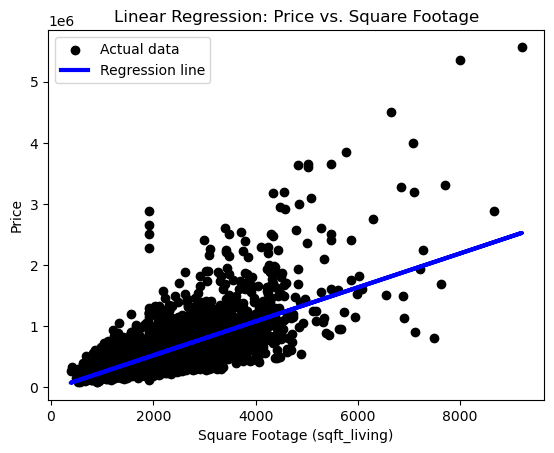

In [69]:
# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Square Footage')
plt.legend()
plt.show()

From this scatter plot we can see that the price and square footage are positively correlated. The data points become fairly spread out as square footage increases meaning there is variability in the prices for larger homes. We can also see there a few outliers in both square footage and price which can affect the regression line. 

We will now be using our Sales2 data for a more accurate regression. This regression model will use multiple linear regression including several other variables. This will hopefully increase the R^2 value and decrease the RMSE value. Meaning our model will be more accurate and have less prediction error. 

In [70]:
df2 = sales2

# Add more relevant features based on the dataset
features = ['sqft_living', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',]
X2 = df2[features]
y2 = df2['price']  # Target variable

In [71]:
# Handle missing values using SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')
X2 = imputer.fit_transform(X2)
y2 = y.fillna(y.median())

In [72]:
# Step 3: Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [73]:
# Step 4: Train the multiple linear regression model
model = LinearRegression()
model.fit(X2_train, y2_train)

# Step 5: Evaluate the model
y2_pred = model.predict(X2_test)

# Calculate metrics
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y2_test, y2_pred)

print(f'Mean Squared Error: {mse2}')
print(f'Root Mean Squared Error (RMSE): {rmse2}')
print(f'R^2 Score: {r22}')

Mean Squared Error: 65088691345.24607
Root Mean Squared Error (RMSE): 255124.85442474255
R^2 Score: 0.5694529245042899


With the implementation of the Sales2 we have reduced our RMSE to 255,178 and increased our R^2 score to .569 or 56.9%. Meaning our new predicitons will be on average be off by 255,178 dollar and our regression explains 56.9% of the data. 

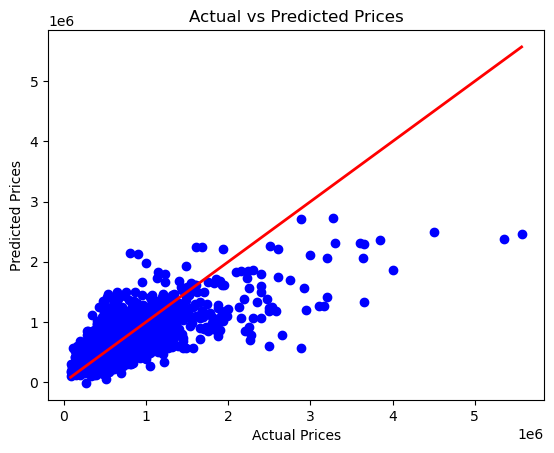

In [74]:
# Step 6: Plot the results (optional)
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

Since these regressions did not give us the results that we wanted, we will now try different regressions to try to bring down the RMSE value and attempt to increase our R^2. 

We decided to use a Decision Tree Regression because it can predict continuous valued outputs instead of discrete outputs because here we are stating the probable price of a house based on a few features. They are also good for non linear data. Decision trees are susceptible to overfitting, so we will be weary of that. We chose to remove data that was categorical because this model requires numerical data.

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
X = sales2[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'age_reno']]
y = sales2['price']

In [197]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [198]:
DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

We'll use the mean absolute error (MAE) to find out how accurate this model is. It returned 1045.13, which means that on average the model's predictions are only off by $1,045, which seems really good

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))  
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=['Not Affordable', 'Affordable'])
plt.title('Decision Tree Visualization')
plt.show()


Before we continued working on this model we wanted to visualize the decision tree. As you can see it is rather large, so below is the tree zoomed in a bit, so you cannot see the entire tree, but you can see close up a few of the leaves and read it.

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

figsize = (20, 15)  
fontsize = 12

plt.figure(figsize=figsize) 
plot_tree(model, 
          feature_names=X.columns,  
          filled=True,
          rounded=True,
          fontsize=fontsize,
          precision=2)  

plt.title('Decision Tree Visualization', fontsize=16)
plt.show()

We had trained the model and validated it on the same data, so instead we'll exclude some of the data from what we will use to train the model, and then test our model on that data that was excluded (validating).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model = DecisionTreeRegressor()
model.fit(train_X, train_y)

val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

A MAE of 203,381 is not good, so we want to optimize this model. A good way to do that is using max leaf nodes. This limits the leaves, which in turn makes sure we are not overfitting or underfitting the model.

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

We compared a few options for leaf nodes, which we found 100 leaves to be optimal because it returned the lowest MAE with 163,031.

In [ ]:
for max_leaf_nodes in [5, 50, 100, 250, 500, 1000, 2500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

In [ ]:
optimal_max_leaf_nodes = 100

model = DecisionTreeRegressor(max_leaf_nodes=optimal_max_leaf_nodes, random_state=0)

model.fit(train_X, train_y)

val_predictions = model.predict(val_X)

val_mae = mean_absolute_error(val_y, val_predictions)
print(f'Validation Mean Absolute Error with max_leaf_nodes={optimal_max_leaf_nodes}: {val_mae}')

But we want to continue optimizing the model by using a random forest which uses multiple trees to make predictions. This time it returned a MAE of 150,359, which still isn't great, but it is has at least been moving in the right direction.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X, train_y)
house_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, house_preds))

Actual vs. Predicted Plot - this visualization helps us to understand how well the model's predictions match the true values.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Predicted', data=results_sales2, alpha=0.6)

plt.plot([results_sales2['Actual'].min(), results_sales2['Actual'].max()],
         [results_sales2['Actual'].min(), results_sales2['Actual'].max()],
         'r--', lw=2)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlim(results_sales2['Actual'].min(), results_sales2['Actual'].max())
plt.ylim(results_sales2['Predicted'].min(), results_sales2['Predicted'].max())

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=16)

plt.show()

One advantage of Random Forest models is their ability to compute feature importance. This can help us understand which features are driving the predictions. As we can see in the graph below that is sqft_living in our dataset.

In [ ]:
importances = forest_model.feature_importances_
features = train_X.columns

indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), features[indices])
plt.xlabel('Importance')
plt.show()

Feature importance